In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [3]:
t_data=[]
t_label=[]
te_data=[]
te_label=[]
for i in range(1,3):
    t_data.append(train_data[train_labels==i])
    t_label.append(train_labels[train_labels==i])
    te_data.append(test_data[test_labels==i])
    te_label.append(test_labels[test_labels==i])
X=np.concatenate((t_data[0],t_data[1]),axis=0)
lx=np.concatenate((t_label[0],t_label[1]),axis=0)
Y=np.concatenate((te_data[0],te_data[1]),axis=0)
ly=np.concatenate((te_label[0],te_label[1]),axis=0)

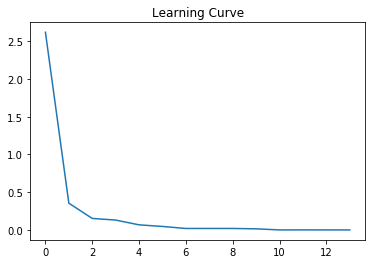

In [18]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(hidden_layer_sizes=(1000,1000),max_iter=100,learning_rate_init=0.0001)
clf2.fit(X,lx)
plt.plot(clf2.loss_curve_)
plt.title('Learning Curve')
plt.savefig('lcurve3.pdf')
plt.show()

In [19]:
a2=clf2.score(Y,ly)
print('Accuracy for two hidden layer:',a2)

Accuracy for two hidden layer: 0.99
